# Test 4 - Comparison vs FM paper: CoinCollector, CookingGame, TreasureHunter

In [ ]:
! tar czf Testing.tar *

In [ ]:
! nvidia-smi

In [1]:
import pickle
import random

In [ ]:
import sys
sys.path.append("../Self-evaluation")

from self_evaluation import play, LLMAgentSelfEvaluate

## Game generation

Idea:
- two models used: no-think and 10-think
- different difficulty levels: 6 for coin collector, ~5 for common sense,~ 5 for cooking, 8 for treasure hunter
- 5 seeds per case (vs 40 in FM paper), 1 episode per seed
- total episodes: 240 (190 without commonsense)

In [2]:
levels = {"coin_collector": 20, "cooking": 5, "treasure_hunter": 15}
seeds = range(1,11)

In [ ]:
import subprocess

for game in levels.keys():
    if game == "cooking":
        continue # we generate cooking in another way
    for level in range(1, levels[game]+1):
        for seed in seeds:
            subprocess.run(["tw-make", f"tw-{game}", "--level", f"{level}", "--seed", f"{seed}", "--output", f"games/{game}/level{level}-seed{seed}.z8"]) 

In [ ]:
# redo coin collector level 8 with more seeds
for seed in seeds:
    subprocess.run(["tw-make", "tw-coin_collector", "--level", "8", "--seed", f"{seed}", "--output", f"games/coin_collector/level8-seed{seed}.z8"])

# play immediately
for n in n_think_indices:
    results_all_seeds = []
    for seed in seeds:
        results = play(LLMAgentSelfEvaluate(selfeval_turns=n, verbose=False),
                f"games/coin_collector/level8-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
        results_all_seeds.append(results[0]) # only one episode
    with open(f"./Testing 4/{n}think_coin_collector_level8", "wb") as f:
        pickle.dump(results_all_seeds, f)
        print("Data pickled.")
        f.close()

In [ ]:
# treasure hunter levels 16-30

import subprocess

for game in levels.keys():
    if game == "cooking" or game == "coin_collector":
        continue # we generate in another way
    for level in range(16, 30):
        for seed in seeds:
            subprocess.run(["tw-make", f"tw-{game}", "--level", f"{level}", "--seed", f"{seed}", "--output", f"games/{game}/level{level}-seed{seed}.z8"]) 

In [ ]:
!tw-make tw-treasure_hunter --seed 11 --level 20 --output games/treasure_hunter/level20-seed3.z8

In [ ]:
!tw-make tw-treasure_hunter --seed 13 --level 9 --output games/treasure_hunter/level9-seed8.z8
!tw-make tw-treasure_hunter --seed 15 --level 9 --output games/treasure_hunter/level9-seed9.z8
!tw-make tw-treasure_hunter --seed 13 --level 10 --output games/treasure_hunter/level10-seed8.z8
!tw-make tw-treasure_hunter --seed 15 --level 10 --output games/treasure_hunter/level10-seed9.z8

#### Cooking

In [ ]:
!tw-make tw-cooking --seed 1 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed1.z8
!tw-make tw-cooking --seed 2 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed2.z8
!tw-make tw-cooking --seed 3 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed3.z8
!tw-make tw-cooking --seed 4 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed4.z8
!tw-make tw-cooking --seed 5 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed5.z8
!tw-make tw-cooking --seed 6 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed6.z8
!tw-make tw-cooking --seed 7 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed7.z8
!tw-make tw-cooking --seed 8 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed8.z8
!tw-make tw-cooking --seed 9 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed9.z8
!tw-make tw-cooking --seed 10 --go 1 --take 1 --recipe 1 --cut --cook --output games/cooking/level1-seed10.z8

!tw-make tw-cooking --seed 1 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed1.z8
!tw-make tw-cooking --seed 2 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed2.z8
!tw-make tw-cooking --seed 3 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed3.z8
!tw-make tw-cooking --seed 4 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed4.z8
!tw-make tw-cooking --seed 5 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed5.z8
!tw-make tw-cooking --seed 6 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed6.z8
!tw-make tw-cooking --seed 7 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed7.z8
!tw-make tw-cooking --seed 8 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed8.z8
!tw-make tw-cooking --seed 9 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed9.z8
!tw-make tw-cooking --seed 10 --go 1 --take 2 --recipe 2 --cut --cook --output games/cooking/level2-seed10.z8

!tw-make tw-cooking --seed 1 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed1.z8
!tw-make tw-cooking --seed 2 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed2.z8
!tw-make tw-cooking --seed 3 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed3.z8
!tw-make tw-cooking --seed 4 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed4.z8
!tw-make tw-cooking --seed 5 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed5.z8
!tw-make tw-cooking --seed 6 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed6.z8
!tw-make tw-cooking --seed 7 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed7.z8
!tw-make tw-cooking --seed 8 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed8.z8
!tw-make tw-cooking --seed 9 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed9.z8
!tw-make tw-cooking --seed 10 --go 1 --take 3 --recipe 3 --cut --cook --output games/cooking/level3-seed10.z8

!tw-make tw-cooking --seed 1 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed1.z8
!tw-make tw-cooking --seed 2 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed2.z8
!tw-make tw-cooking --seed 3 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed3.z8
!tw-make tw-cooking --seed 4 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed4.z8
!tw-make tw-cooking --seed 5 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed5.z8
!tw-make tw-cooking --seed 6 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed6.z8
!tw-make tw-cooking --seed 7 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed7.z8
!tw-make tw-cooking --seed 8 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed8.z8
!tw-make tw-cooking --seed 9 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed9.z8
!tw-make tw-cooking --seed 10 --go 6 --take 1 --recipe 1 --cut --cook --output games/cooking/level4-seed10.z8

!tw-make tw-cooking --seed 1 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed1.z8
!tw-make tw-cooking --seed 2 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed2.z8
!tw-make tw-cooking --seed 3 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed3.z8
!tw-make tw-cooking --seed 4 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed4.z8
!tw-make tw-cooking --seed 5 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed5.z8
!tw-make tw-cooking --seed 6 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed6.z8
!tw-make tw-cooking --seed 7 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed7.z8
!tw-make tw-cooking --seed 8 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed8.z8
!tw-make tw-cooking --seed 9 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed9.z8
!tw-make tw-cooking --seed 10 --go 6 --take 2 --recipe 2 --cut --cook --output games/cooking/level5-seed10.z8

## Game running

In [3]:
n_think_indices = [0, 10]
n_episodes = 1
max_steps = 100

In [13]:
for n in n_think_indices:
    for game in levels.keys():
        if n == 0 and (game == "coin_collector" or game == "cooking"):
            continue # skip runs we've already done
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            for seed in seeds:
                results = play(LLMAgentSelfEvaluate(selfeval_turns=n, verbose=False),
                               f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
                results_all_seeds.append(results[0]) # only one episode
            with open(f"./Testing 4/{n}think_{game}_level{level}", "wb") as f:
                pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
                print("Data pickled.")
                f.close()

games/treasure_hunter/level1-seed1.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed2.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed3.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed4.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed5.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed6.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed7.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed8.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed9.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level1-seed10.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
Data pickled.
games/treasure_hunter/level2-seed1.z8 .  	avg. steps:   1.0; avg. score:  1.0 / 1.
games/treasure_hunter/level2-seed2.z8 .  	avg. steps:   1.0; avg. score:

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I think I'm stuck in a loop trying to take a key that isn't there. Let me try a different approach. Maybe I should look around the room more carefully or check the dish-pit area for the coin. 

**Next action:** look around' was truncated to 'I think I'm stuck in a loop trying to take a key that isn't there. Let me try a different approach. Maybe I should look around the room more carefully or check the dish-pit area for the coin. 

**Ne'.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level4-seed2.z8 .  	avg. steps:   4.0; avg. score:  1.0 / 1.
games/coin_collector/level4-seed3.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level4-seed4.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
games/coin_collector/level4-seed5.z8 .  	avg. steps:   4.0; avg. score:  1.0 / 1.
games/coin_collector/level4-seed6.z8 .  	avg. steps:  42.0; avg. score:  1.0 / 1.
games/coin_collector/level4-seed7.z8 .  	avg. steps:   4.0; avg. score:  1.0 / 1.
games/coin_collector/level4-seed8.z8 .  	avg. steps:   4.0; avg. score:  1.0 / 1.
games/coin_collector/level4-seed9.z8 .  	avg. steps:   4.0; avg. score:  1.0 / 1.
games/coin_collector/level4-seed10.z8 .  	avg. steps:   4.0; avg. score:  1.0 / 1.
Data pickled.
games/coin_collector/level5-seed1.z8 .  	avg. steps:   5.0; avg. score:  1.0 / 1.
games/coin_collector/level5-seed2.z8 .  	avg. steps:   5.0; avg. score:  1.0 / 1.
games/coin_collector/level5-seed3.z8 .

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'go to fridge

You go to the fridge. The fridge contains a red onion, a raw red tuna, an orange bell pepper and a lettuce. You can take the red onion from the fridge. 

>                                                                                                                                -= Kitchen =-0/4' was truncated to 'go to fridge

You go to the fridge. The fridge contains a red onion, a raw red tuna, an orange bell pepper and a lettuce. You can take the red onion from the fridge. 

>                             '.
  warnings.warn(msg, TruncatedInputActionWarning)
/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'put onion on counter

You put the red onion on the counter. The counter 

.  	avg. steps: 100.0; avg. score:  0.0 / 8.
games/cooking/level2-seed5.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 8.
games/cooking/level2-seed6.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 8.
games/cooking/level2-seed7.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 8.
games/cooking/level2-seed8.z8 .  	avg. steps:  54.0; avg. score:  1.0 / 8.
games/cooking/level2-seed9.z8 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'The game seems to have reached its conclusion. You've successfully cooked and eaten the meal! The ingredients are no longer on the table since you've consumed them. The original goal of "enjoying your meal" is achieved. No further actions are needed. 🍽️' was truncated to 'The game seems to have reached its conclusion. You've successfully cooked and eaten the meal! The ingredients are no longer on the table since you've consumed them. The original goal of "enjoying yo'.
  warnings.warn(msg, TruncatedInputActionWarning)
/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'The game appears to be stuck in a loop due to a state inconsistency. You've already consumed all ingredients (cheese and green bell 

.  	avg. steps: 100.0; avg. score:  0.0 / 8.
games/cooking/level2-seed10.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 8.
Data pickled.
games/cooking/level3-seed1.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 11.
games/cooking/level3-seed2.z8 

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I think I'm on the right track, but I need to clarify the next step. Since the cookbook isn't openable, maybe I should focus on preparing ingredients for the recipe. The green hot pepper is a key ingredient, so I'll try cutting it again with the knife.  

**Next action:** cut green hot pepper with knife' was truncated to 'I think I'm on the right track, but I need to clarify the next step. Since the cookbook isn't openable, maybe I should focus on preparing ingredients for the recipe. The green hot pepper is a key in'.
  warnings.warn(msg, TruncatedInputActionWarning)
/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action '**Next action:** cook meal with ingredients (sliced green hot pepper, red apple, 

.  	avg. steps: 100.0; avg. score:  2.0 / 11.
games/cooking/level3-seed3.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11.
games/cooking/level3-seed4.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 11.
games/cooking/level3-seed5.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 11.
games/cooking/level3-seed6.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 11.
games/cooking/level3-seed7.z8 .  	avg. steps: 100.0; avg. score:  2.0 / 11.
games/cooking/level3-seed8.z8 .  	avg. steps: 100.0; avg. score:  3.0 / 11.
games/cooking/level3-seed9.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 11.
games/cooking/level3-seed10.z8 .  	avg. steps: 100.0; avg. score:  4.0 / 11.
Data pickled.
games/cooking/level4-seed1.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5.
games/cooking/level4-seed2.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 5.
games/cooking/level4-seed3.z8 .  	avg. steps:  52.0; avg. score:  1.0 / 5.
games/cooking/level4-seed4.z8 .  	avg. steps:  87.0; avg. score:  1.0 / 5.
games/cooking/level4-seed5.z8 .

/usr/local/lib/python3.12/site-packages/jericho/jericho.py:484: TruncatedInputActionWarning: Once converted to bytes, actions should have less than 198 characters. Action 'I think I might be stuck in a loop. The key isn't visible here, and moving west requires something I don't have. Maybe I need to explore the basement more carefully or look for clues about where the key is. Let me try searching the room again.  

**next action**: look around' was truncated to 'I think I might be stuck in a loop. The key isn't visible here, and moving west requires something I don't have. Maybe I need to explore the basement more carefully or look for clues about where the'.
  warnings.warn(msg, TruncatedInputActionWarning)


.  	avg. steps: 100.0; avg. score:  0.0 / 1.
Data pickled.
games/treasure_hunter/level10-seed1.z8 .  	avg. steps:   1.0; avg. score:  0.0 / 1.
games/treasure_hunter/level10-seed2.z8 .  	avg. steps:   5.0; avg. score:  1.0 / 1.
games/treasure_hunter/level10-seed3.z8 .  	avg. steps:   5.0; avg. score:  1.0 / 1.
games/treasure_hunter/level10-seed4.z8 .  	avg. steps:   5.0; avg. score:  1.0 / 1.
games/treasure_hunter/level10-seed5.z8 .  	avg. steps:   5.0; avg. score:  1.0 / 1.
games/treasure_hunter/level10-seed6.z8 .  	avg. steps:   3.0; avg. score:  1.0 / 1.
games/treasure_hunter/level10-seed7.z8 .  	avg. steps:   4.0; avg. score:  0.0 / 1.
games/treasure_hunter/level10-seed8.z8 .  	avg. steps:  63.0; avg. score:  1.0 / 1.
games/treasure_hunter/level10-seed9.z8 .  	avg. steps:   5.0; avg. score:  1.0 / 1.
games/treasure_hunter/level10-seed10.z8 .  	avg. steps: 100.0; avg. score:  0.0 / 1.
Data pickled.
games/treasure_hunter/level11-seed1.z8 .  	avg. steps:   2.0; avg. score:  1.0 / 1.
ga

In [ ]:
# VERBOSE PLAYS

play(LLMAgentSelfEvaluate(selfeval_turns=5, verbose=True),
     f"games/cooking/level1-seed1.z8", max_steps=max_steps, n_episodes=n_episodes)

### Extra runs

In [ ]:
for n in n_think_indices:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            if game == "cooking" or (game == "coin_collector") or (game == "treasure_hunter" and level <= 15):
                continue # skip runs we've already done
            results_all_seeds = []
            for seed in seeds:
                results = play(LLMAgentSelfEvaluate(selfeval_turns=n, verbose=False),
                               f"games/{game}/level{level}-seed{seed}.z8", max_steps=max_steps, n_episodes=n_episodes)
                results_all_seeds.append(results[0]) # only one episode
            with open(f"./Testing 4/{n}think_{game}_level{level}", "wb") as f:
                pickle.dump(results_all_seeds, f) # so we dump already with grouping by seed!!
                print("Data pickled.")
                f.close()

# Data aggregation for visualization

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bootstrap

In [5]:
max_scores_cooking = [5, 8, 11, 5, 8]

In [6]:
coin_nothink = []
coin_nothink_ci = []
coin_10think = []
coin_10think_ci = []
treasure_nothink = []
treasure_nothink_ci = []
treasure_10think = []
treasure_10think_ci = []
cooking_nothink = []
cooking_nothink_ci = []
cooking_10think = []
cooking_10think_ci = []

final_arrays = {"coin_collector": {0: (coin_nothink, coin_nothink_ci), 10: (coin_10think, coin_10think_ci)},
                "treasure_hunter": {0: (treasure_nothink, treasure_nothink_ci), 10: (treasure_10think, treasure_10think_ci)},
                "cooking": {0: (cooking_nothink, cooking_nothink_ci), 10: (cooking_10think, cooking_10think_ci)}}

for n in n_think_indices:
    for game in levels.keys():
        for level in range(1, levels[game]+1):
            results_all_seeds = []
            with open(f"./Testing 4/{n}think_{game}_level{level}", "rb") as f:
                results_all_seeds = pickle.load(f)
                f.close()
            final_scores = [run[-1][1] for run in results_all_seeds] # last step, score
            if game == "cooking":
                final_scores = np.array(final_scores) / max_scores_cooking[level - 1] # we need to normalize the results of cooking
            avg_final_score = np.mean(final_scores)
            bootstrap_results = bootstrap(data=(final_scores,), 
                                statistic=np.mean,
                                method="basic",
                                n_resamples=1000,
                                confidence_level=0.9)
            final_arrays[game][n][0].append(avg_final_score)
            final_arrays[game][n][1].append((bootstrap_results.confidence_interval.high, bootstrap_results.confidence_interval.low))

FileNotFoundError: [Errno 2] No such file or directory: './Testing 4/10think_coin_collector_level15'

# Visualization

In [17]:
figsize=(12,20)

In [18]:
ylims = {"coin_collector": (0,1),
         "cooking": (0, 0.5),
         "treasure_hunter": (0.1, 1)}

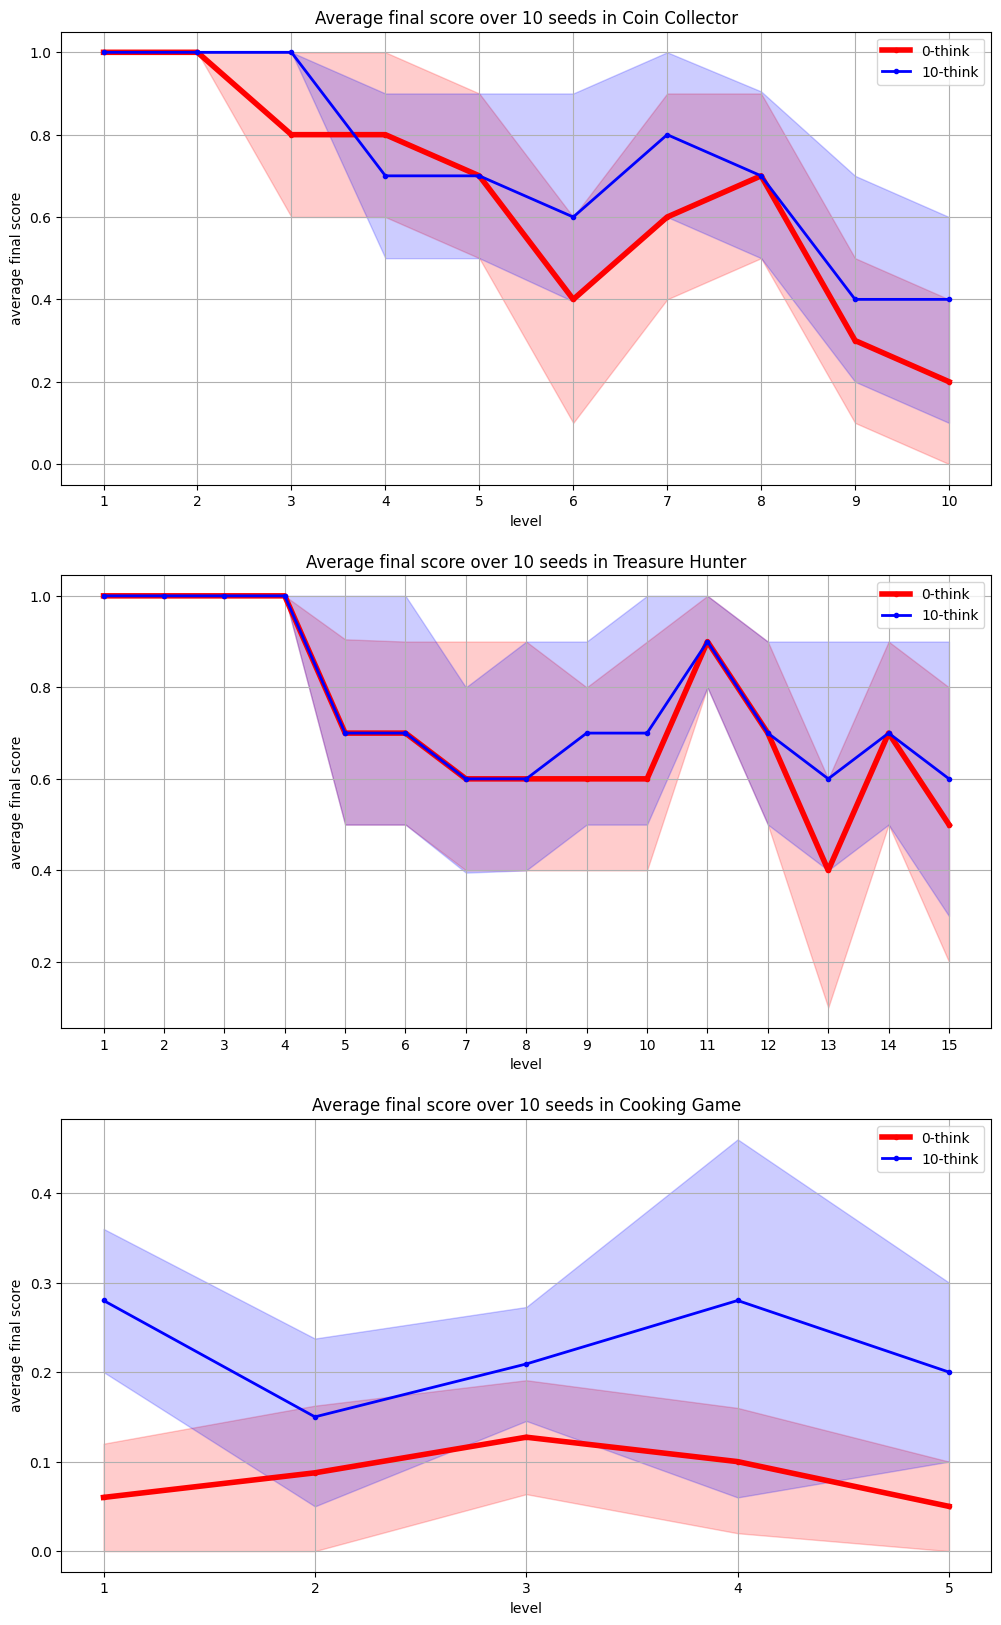

In [20]:
fig, axes = plt.subplots(3,1, figsize=figsize)
prettified_names = {"coin_collector": "Coin Collector", "treasure_hunter": "Treasure Hunter", "cooking": "Cooking Game"}

for i, game in enumerate(final_arrays.keys()):
    ax = axes[i]
    x = list(range(1, levels[game]+1))
    y_0, y_0_ci = final_arrays[game][0]
    y_10, y_10_ci = final_arrays[game][10]

    ax.fill_between(x,
                    np.clip([i[0] for i in y_0_ci], 0, 1),
                    np.clip([i[1] for i in y_0_ci], 0, 1),
                    alpha=0.2, color="red")
    ax.fill_between(x,
                    np.clip([i[0] for i in y_10_ci], 0, 1),
                    np.clip([i[1] for i in y_10_ci], 0, 1),
                    alpha=0.2, color="blue")

    ax.plot(x, y_0, label="0-think", marker=".", linestyle="-", color="red", linewidth=4)
    ax.plot(x, y_10, label="10-think", marker=".", linestyle="-", color="blue", linewidth=2)
    
    ax.set_title(f"Average final score over 10 seeds in {prettified_names[game]}")
    ax.set_xlabel('level')
    ax.set_ylabel('average final score')
    ax.legend()

    ax.set_xticks(x)
    # ax.set_ylim(ylims[game][0], ylims[game][1])
    ax.grid()

plt.show()